<a href="https://colab.research.google.com/github/MJ7869/Titanic-Survival-Prediction-using-Logistic-Regression/blob/main/Titanic_Survival_Prediction_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
df=sns.load_dataset("titanic")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Data Cleansing Process or Data Pre-processing Now:


1.   Fill , remove NaN Value
2.   Remove non-numeric columns / convert non-numeric columns to numeric data
3.   Discard those columns which are non-correlated with target column
4.   split data in x (independent columns values) and y (target column)
5.   split data in train , test sets
6.   pass data to algo for prediction





There are three columns which are having NaN Values:


1.   embark_town, remove 2 records which conatin NaN values
2.   embarked, remove 2 records which conatin NaN values
3.   deck, remove (drop) as majority of values are NaN
4.   age, fill NaN values



In [ ]:
df=df[df.embark_town.isna()==False]

In [ ]:
df.info()     #so if you see now total number of entries it got reduced by two, so the objective of deleting or removing 2 records in embark_town n embarked which are having Nan values is completed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  deck         201 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        889 non-null    object  
 14  alone        889 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 87.3+ KB


Pandas dataframe.isna() function is used to **detect missing values**.

It return a **boolean same-sized** object indicating **if the values are NA**. NA values, such as None or numpy.NaN, gets **mapped to True value**s.

Everything else gets mapped to False values.

** Characters such as empty strings ” or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).**

In [ ]:
df.drop("deck", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          712 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [ ]:
def age(cols):
  age=cols[0]
  clas=cols[1]

  if age.isnull:
    if clas==1:
      return 38
    elif clas==2:
      return 30
    elif clas==3:
      return 25
  else:
    return age

In [ ]:
df["age"].mean()

29.64209269662921

In [ ]:
df.corr()

<ipython-input-95-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.335549,-0.082446,-0.034040,0.083151,0.255290,-0.555520,-0.206207
pclass,-0.335549,1.000000,-0.365902,0.081656,0.016824,-0.548193,0.090098,0.138553
age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,0.286543,0.195766
sibsp,-0.034040,0.081656,-0.307351,1.000000,0.414542,0.160887,-0.255401,-0.584186
parch,0.083151,0.016824,-0.187896,0.414542,1.000000,0.217532,-0.351945,-0.583112
fare,0.255290,-0.548193,0.093143,0.160887,0.217532,1.000000,-0.179851,-0.274079
adult_male,-0.555520,0.090098,0.286543,-0.255401,-0.351945,-0.179851,1.000000,0.407992
alone,-0.206207,0.138553,0.195766,-0.584186,-0.583112,-0.274079,0.407992,1.000000


In [ ]:
df["pclass"].unique()

array([3, 1, 2])

In [ ]:
df.groupby("pclass").mean()

<ipython-input-97-472d451268e5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("pclass").mean()


,survived,age,sibsp,parch,fare,adult_male,alone
pclass,,,,,,,
1,0.626168,38.105543,0.420561,0.359813,84.193516,0.556075,0.500000
2,0.472826,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
3,0.242363,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


In [ ]:
#UDF to fill the NaN values in AGE column using pclass column because age has the maximum dependency on pclass as we can see above in corr function

import pandas as pd

def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
      if pclass == 1:
        return 38
      elif pclass == 2:
        return 30
      else:
        return 25
    else:
      return age

In [ ]:
df["age"]=df[["age","pclass"]].apply(impute_age, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


<Axes: xlabel='sex', ylabel='count'>

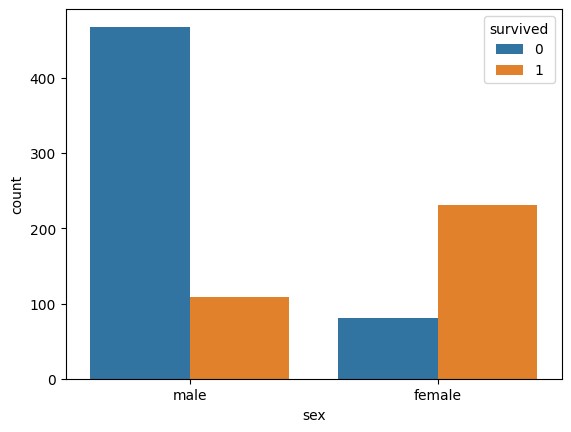

In [ ]:
sns.countplot(data=df, x="sex", hue="survived")

**List of non-numeric columns**

1.  sex - **convert** this column from non-numeric to numeric values
2.  embarked - **convert** this column from non-numeric to numeric values
3.  class - we will discard (drop) this column , as we have its numeric alternate column named pclass
4.  who - **convert** this column from non-numeric to numeric values
5.  adult_male - we will discard (drop) this column , as we have its numeric alternate columns combination named sex and who
6.  embark_town - **convert** this column from non-numeric to numeric values
7.  alive - we will discard (drop) this column , as we have its numeric alternate column named survived
8.  alone - **convert** this column from non-numeric to numeric values

In [ ]:
df.drop(["class","adult_male","alive"],axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   who          889 non-null    object 
 9   embark_town  889 non-null    object 
 10  alone        889 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 77.3+ KB


**pandas.get_dummies()** is used for data manipulation. It converts categorical data into dummy or indicator variables.

syntax:  pandas.get_dummies(data, prefix=None, prefix_sep=’_’, dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

**Parameters:**

1. data: whose data is to be manipulated.
2. prefix: String to append DataFrame column names. Pass a list with length equal to the number of columns when calling get_dummies on a DataFrame. Default value is None.
3. prefix_sep: Separator/delimiter to use if appending any prefix. Default is ‘_’
4. dummy_na: It adds a column to indicate NaN values, default value is false, If false NaNs are ignored.
5. columns: Column names in the DataFrame that needs to be encoded. Default value is None, If columns is None then all the columns with object or category dtype will be converted.
6. sparse: It  specify whether the dummy-encoded columns should be backed by a SparseArray (True) or a regular NumPy array (False). default value is False.
7. drop_first: Remove first level to get k-1 dummies out of k categorical levels.
8. dtype: Data type for new columns. Only a single dtype is allowed. Default value is np.uint8.


**Returns: Dataframe (Dummy-coded data**)

In [ ]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df1=pd.get_dummies(df.sex)

In [ ]:
df1

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
df=pd.concat([df1,df],axis=1)

In [ ]:
df.head()

,female,male,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,embark_town,alone
0,0,1,0,3,male,22.0,1,0,7.2500,S,man,Southampton,False
1,1,0,1,1,female,38.0,1,0,71.2833,C,woman,Cherbourg,False
2,1,0,1,3,female,26.0,0,0,7.9250,S,woman,Southampton,True
3,1,0,1,1,female,35.0,1,0,53.1000,S,woman,Southampton,False
4,0,1,0,3,male,35.0,0,0,8.0500,S,man,Southampton,True


In [ ]:
df.pop("sex")

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 889, dtype: object

In [ ]:
df

,female,male,survived,pclass,age,sibsp,parch,fare,embarked,who,embark_town,alone
0,0,1,0,3,22.0,1,0,7.2500,S,man,Southampton,False
1,1,0,1,1,38.0,1,0,71.2833,C,woman,Cherbourg,False
2,1,0,1,3,26.0,0,0,7.9250,S,woman,Southampton,True
3,1,0,1,1,35.0,1,0,53.1000,S,woman,Southampton,False
4,0,1,0,3,35.0,0,0,8.0500,S,man,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,2,27.0,0,0,13.0000,S,man,Southampton,True
887,1,0,1,1,19.0,0,0,30.0000,S,woman,Southampton,True
888,1,0,0,3,25.0,1,2,23.4500,S,woman,Southampton,False
889,0,1,1,1,26.0,0,0,30.0000,C,man,Cherbourg,True


In [ ]:
df.corr()

<ipython-input-111-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,female,male,survived,pclass,age,sibsp,parch,fare,alone
female,1.000000,-1.000000,0.541585,-0.127741,-0.085564,0.116348,0.247508,0.179958,-0.306985
male,-1.000000,1.000000,-0.541585,0.127741,0.085564,-0.116348,-0.247508,-0.179958,0.306985
survived,0.541585,-0.541585,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290,-0.206207
pclass,-0.127741,0.127741,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193,0.138553
age,-0.085564,0.085564,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205,0.168213
sibsp,0.116348,-0.116348,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887,-0.584186
parch,0.247508,-0.247508,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532,-0.583112
fare,0.179958,-0.179958,0.255290,-0.548193,0.118205,0.160887,0.217532,1.000000,-0.274079
alone,-0.306985,0.306985,-0.206207,0.138553,0.168213,-0.584186,-0.583112,-0.274079,1.000000


In [ ]:
df["embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
df2=pd.get_dummies(df.embarked)

In [ ]:
df=pd.concat([df2,df],axis=1)

In [ ]:
df

,C,Q,S,female,male,survived,pclass,age,sibsp,parch,fare,embarked,who,embark_town,alone
0,0,0,1,0,1,0,3,22.0,1,0,7.2500,S,man,Southampton,False
1,1,0,0,1,0,1,1,38.0,1,0,71.2833,C,woman,Cherbourg,False
2,0,0,1,1,0,1,3,26.0,0,0,7.9250,S,woman,Southampton,True
3,0,0,1,1,0,1,1,35.0,1,0,53.1000,S,woman,Southampton,False
4,0,0,1,0,1,0,3,35.0,0,0,8.0500,S,man,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,0,2,27.0,0,0,13.0000,S,man,Southampton,True
887,0,0,1,1,0,1,1,19.0,0,0,30.0000,S,woman,Southampton,True
888,0,0,1,1,0,0,3,25.0,1,2,23.4500,S,woman,Southampton,False
889,1,0,0,0,1,1,1,26.0,0,0,30.0000,C,man,Cherbourg,True


In [ ]:
df.pop("embarked")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 889, dtype: object

In [ ]:
df.head()

,C,Q,S,female,male,survived,pclass,age,sibsp,parch,fare,who,embark_town,alone
0,0,0,1,0,1,0,3,22.0,1,0,7.2500,man,Southampton,False
1,1,0,0,1,0,1,1,38.0,1,0,71.2833,woman,Cherbourg,False
2,0,0,1,1,0,1,3,26.0,0,0,7.9250,woman,Southampton,True
3,0,0,1,1,0,1,1,35.0,1,0,53.1000,woman,Southampton,False
4,0,0,1,0,1,0,3,35.0,0,0,8.0500,man,Southampton,True


In [ ]:
df.corr()

<ipython-input-118-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,C,Q,S,female,male,survived,pclass,age,sibsp,parch,fare,alone
C,1.000000,-0.148646,-0.782613,0.084520,-0.084520,0.169966,-0.245733,0.043681,-0.060074,-0.011588,0.270731,-0.094513
Q,-0.148646,1.000000,-0.499261,0.075217,-0.075217,0.004536,0.220558,-0.070847,-0.026692,-0.081585,-0.116684,0.087099
S,-0.782613,-0.499261,1.000000,-0.121405,0.121405,-0.151777,0.076466,0.006325,0.069438,0.061512,-0.163758,0.027982
female,0.084520,0.075217,-0.121405,1.000000,-1.000000,0.541585,-0.127741,-0.085564,0.116348,0.247508,0.179958,-0.306985
male,-0.084520,-0.075217,0.121405,-1.000000,1.000000,-0.541585,0.127741,0.085564,-0.116348,-0.247508,-0.179958,0.306985
survived,0.169966,0.004536,-0.151777,0.541585,-0.541585,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290,-0.206207
pclass,-0.245733,0.220558,0.076466,-0.127741,0.127741,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193,0.138553
age,0.043681,-0.070847,0.006325,-0.085564,0.085564,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205,0.168213
sibsp,-0.060074,-0.026692,0.069438,0.116348,-0.116348,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887,-0.584186
parch,-0.011588,-0.081585,0.061512,0.247508,-0.247508,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532,-0.583112


In [ ]:
df["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

**LabelEncoder:-**

* utility class commonly used for **encoding categorical labels with numerical values.**
Many machine learning algorithms and models require numerical input, and categorical variables (such as class labels) are often represented as strings or other non-numeric types
**helps in converting these categorical labels into numerical format**

**Here's a brief explanation of how LabelEncoder works:**

**1. Fit and Transform:**

First, you "fit" the LabelEncoder to the unique labels in your categorical data. This means the encoder learns the mapping between each unique label and a unique integer.
Then, you "transform" your original categorical data into the corresponding numerical values based on the mapping learned during the fitting process.

**2. Inverse Transform:**

You can also perform an "inverse transform" to convert the encoded numerical values back to the original categorical labels if needed.


**NOTE:-  Keep in mind that LabelEncoder assumes ordinality in the labels, meaning that the encoded values represent a ranking or order. If your categorical data doesn't have a meaningful order, you might want to explore other encoding techniques, such as one-hot encoding.**

In [ ]:
df["embark_town"]=Le.fit_transform(df['embark_town'])

In [ ]:
df.head(10)

,C,Q,S,female,male,survived,pclass,age,sibsp,parch,fare,who,embark_town,alone
0,0,0,1,0,1,0,3,22.0,1,0,7.2500,man,2,False
1,1,0,0,1,0,1,1,38.0,1,0,71.2833,woman,0,False
2,0,0,1,1,0,1,3,26.0,0,0,7.9250,woman,2,True
3,0,0,1,1,0,1,1,35.0,1,0,53.1000,woman,2,False
4,0,0,1,0,1,0,3,35.0,0,0,8.0500,man,2,True
5,0,1,0,0,1,0,3,25.0,0,0,8.4583,man,1,True
6,0,0,1,0,1,0,1,54.0,0,0,51.8625,man,2,True
7,0,0,1,0,1,0,3,2.0,3,1,21.0750,child,2,False
8,0,0,1,1,0,1,3,27.0,0,2,11.1333,woman,2,False
9,1,0,0,1,0,1,2,14.0,1,0,30.0708,child,0,False


In [ ]:
df.corr()

<ipython-input-123-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,C,Q,S,female,male,survived,pclass,age,sibsp,parch,fare,embark_town,alone
C,1.000000,-0.148646,-0.782613,0.084520,-0.084520,0.169966,-0.245733,0.043681,-0.060074,-0.011588,0.270731,-0.936244,-0.094513
Q,-0.148646,1.000000,-0.499261,0.075217,-0.075217,0.004536,0.220558,-0.070847,-0.026692,-0.081585,-0.116684,-0.208278,0.087099
S,-0.782613,-0.499261,1.000000,-0.121405,0.121405,-0.151777,0.076466,0.006325,0.069438,0.061512,-0.163758,0.951435,0.027982
female,0.084520,0.075217,-0.121405,1.000000,-1.000000,0.541585,-0.127741,-0.085564,0.116348,0.247508,0.179958,-0.110320,-0.306985
male,-0.084520,-0.075217,0.121405,-1.000000,1.000000,-0.541585,0.127741,0.085564,-0.116348,-0.247508,-0.179958,0.110320,0.306985
survived,0.169966,0.004536,-0.151777,0.541585,-0.541585,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290,-0.169718,-0.206207
pclass,-0.245733,0.220558,0.076466,-0.127741,0.127741,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193,0.164681,0.138553
age,0.043681,-0.070847,0.006325,-0.085564,0.085564,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205,-0.018031,0.168213
sibsp,-0.060074,-0.026692,0.069438,0.116348,-0.116348,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887,0.068900,-0.584186
parch,-0.011588,-0.081585,0.061512,0.247508,-0.247508,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532,0.040449,-0.583112


In [ ]:
df["who"].unique()

array(['man', 'woman', 'child'], dtype=object)

In [ ]:
df["alone"].unique()

array([False,  True])

In [ ]:
df["who"]=Le.fit_transform(df["who"])
df["alone"]=Le.fit_transform(df["alone"])

In [ ]:
df.head()

,C,Q,S,female,male,survived,pclass,age,sibsp,parch,fare,who,embark_town,alone
0,0,0,1,0,1,0,3,22.0,1,0,7.2500,1,2,0
1,1,0,0,1,0,1,1,38.0,1,0,71.2833,2,0,0
2,0,0,1,1,0,1,3,26.0,0,0,7.9250,2,2,1
3,0,0,1,1,0,1,1,35.0,1,0,53.1000,2,2,0
4,0,0,1,0,1,0,3,35.0,0,0,8.0500,1,2,1


In [ ]:
df.corr()

,C,Q,S,female,male,survived,pclass,age,sibsp,parch,fare,who,embark_town,alone
C,1.000000,-0.148646,-0.782613,0.084520,-0.084520,0.169966,-0.245733,0.043681,-0.060074,-0.011588,0.270731,0.033168,-0.936244,-0.094513
Q,-0.148646,1.000000,-0.499261,0.075217,-0.075217,0.004536,0.220558,-0.070847,-0.026692,-0.081585,-0.116684,0.093603,-0.208278,0.087099
S,-0.782613,-0.499261,1.000000,-0.121405,0.121405,-0.151777,0.076466,0.006325,0.069438,0.061512,-0.163758,-0.087985,0.951435,0.027982
female,0.084520,0.075217,-0.121405,1.000000,-1.000000,0.541585,-0.127741,-0.085564,0.116348,0.247508,0.179958,0.638309,-0.110320,-0.306985
male,-0.084520,-0.075217,0.121405,-1.000000,1.000000,-0.541585,0.127741,0.085564,-0.116348,-0.247508,-0.179958,-0.638309,0.110320,0.306985
survived,0.169966,0.004536,-0.151777,0.541585,-0.541585,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290,0.323191,-0.169718,-0.206207
pclass,-0.245733,0.220558,0.076466,-0.127741,0.127741,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193,-0.193029,0.164681,0.138553
age,0.043681,-0.070847,0.006325,-0.085564,0.085564,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205,0.340322,-0.018031,0.168213
sibsp,-0.060074,-0.026692,0.069438,0.116348,-0.116348,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887,-0.134887,0.068900,-0.584186
parch,-0.011588,-0.081585,0.061512,0.247508,-0.247508,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532,-0.054389,0.040449,-0.583112


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df.drop("survived", axis=1), df["survived"], test_size=.2)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
y_test

599    1
246    0
40     0
301    1
726    1
      ..
668    0
684    0
864    0
187    1
733    0
Name: survived, Length: 178, dtype: int64

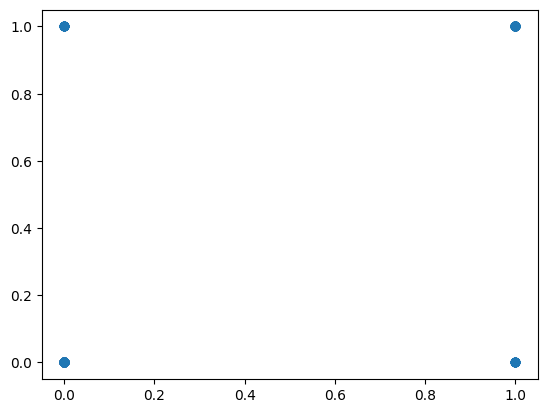

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

**Confusion Matrix:-**    


*  table that is often used in the field of machine learning and data science to **evaluate the performance of a classification algorithm**.
   
*   It is particularly useful for **binary classification problems**, where the goal is to classify instances into one of two classes (positive or negative).

The confusion matrix consists of four entries:

**1. True Positive (TP):** The number of instances that were correctly predicted as positive.

**2. True Negative (TN):** The number of instances that were correctly predicted as negative.

**3. False Positive (FP):** Also known as Type I error, this is the number of instances that were incorrectly predicted as positive when they are actually negative.

**4. False Negative (FN):** Also known as Type II error, this is the number of instances that were incorrectly predicted as negative when they are actually positive.

The matrix is often presented in the following format:


TN
FN
​
  
FP
TP
​

From these values, **several performance metrics can be calculated**, including:

**1. Accuracy:** TP+TN/Confusion Matrix(TP+TN+FP+FN) -->Overall correctness of the model

**2. Precision:** TP/TP+FP --> Proportion of true positives among instances predicted as positive.

**3. Recall (Sensitivity or True Positive Rate):** TP/TP+FN--> Proportion of true positives among actual positives.

**4. Specificity (True Negative Rate):** TN/TN+FP--> Proportion of true negatives among actual negatives.

**5. F1 Score:** 2×Precision×Recall/Precision+Recall-->  **harmonic mean of precision and recall.**


These metrics help in assessing the performance of a classification model and understanding its strengths and weaknesses. The choice of metric depends on the specific goals and requirements of the task at hand.


EXTRA INFO:-

**Predicted as Positive (or Positive Prediction):** Instances that the model classifies as belonging to the positive class. In binary classification, the positive class is often the **class of interest** or the one we want to detect.

**Predicted as Negative (or Negative Prediction):** Instances that the model classifies as belonging to the negative class. In binary classification, the negative class is the other class, not the one of primary interest.


In [ ]:
confusion_matrix(y_pred, y_test)

array([[102,  14],
       [ 14,  48]])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[102,  14],
       [ 14,  48]])

In [ ]:
accuracy_score(y_pred, y_test)

0.8426966292134831